In [14]:
import os
import wave
import glob
import librosa
import cv2
import tensorflow
import matplotlib.pyplot as plt
import librosa.display

In [2]:
def create_spectrogram(y):
    spec = librosa.feature.melspectrogram(y=y)
    spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv

In [3]:
path_to_dataset = "UrbanSound8K/audio"

In [4]:
folds = ["fold1","fold2","fold3","fold4","fold5","fold6","fold7","fold8","fold9","fold10",]

In [5]:
audios = []
errors_file = open("errors.txt", "a")
number = 0
error = 0

for fold in folds:
    aud_per_category = 0
    idx = folds.index(fold)
    for audio in os.listdir(f"{path_to_dataset}/{fold}"):
        aud_per_category += 1
        if aud_per_category == 5:
            break
        if audio == ".DS_Store":
            continue
        path_to_image = f"{path_to_dataset}/{fold}/{audio}"
        print(audio)
        try:
            """
            w = wave.open(path_to_image, 'r')
            y = w.readframes(w.getnframes())
            w.close()
            """
            y, sr = librosa.load(path_to_image)
            audios.append(y)
            
            
            
        except Exception as e:
            error += 1
            errors_file.write(f"{error} | {e}\n")
            
        finally:
            number += 1
        print(f"\rProcessed {number} | Errors: {error}", end="")
errors_file.close()

101415-3-0-2.wav
Processed 1 | Errors: 0101415-3-0-3.wav
Processed 2 | Errors: 0101415-3-0-8.wav
Processed 3 | Errors: 0100652-3-0-0.wav
Processed 4 | Errors: 0100652-3-0-1.wav
Processed 5 | Errors: 0100652-3-0-2.wav
Processed 6 | Errors: 0102105-3-0-0.wav
Processed 7 | Errors: 0103199-4-0-0.wav
Processed 8 | Errors: 0103199-4-0-3.wav
Processed 9 | Errors: 0102102-3-0-0.wav
Processed 10 | Errors: 0107653-9-0-12.wav
Processed 11 | Errors: 0107653-9-0-14.wav
Processed 12 | Errors: 0100032-3-0-0.wav
Processed 13 | Errors: 0100263-2-0-117.wav
Processed 14 | Errors: 0100263-2-0-121.wav
Processed 15 | Errors: 0101281-3-0-0.wav
Processed 16 | Errors: 0101281-3-0-14.wav
Processed 17 | Errors: 0101281-3-0-5.wav
Processed 18 | Errors: 0101848-9-0-0.wav
Processed 19 | Errors: 0101848-9-0-1.wav
Processed 20 | Errors: 0101848-9-0-2.wav
Processed 21 | Errors: 0103076-3-0-0.wav
Processed 22 | Errors: 0103076-3-1-0.wav
Processed 23 | Errors: 0103076-3-2-0.wav
Processed 24 | Errors: 0101729-0-0-1.wav
P

In [6]:
type(audios[0])

numpy.ndarray

In [7]:
create_spectrogram(audios[0])

NameError: name 'np' is not defined

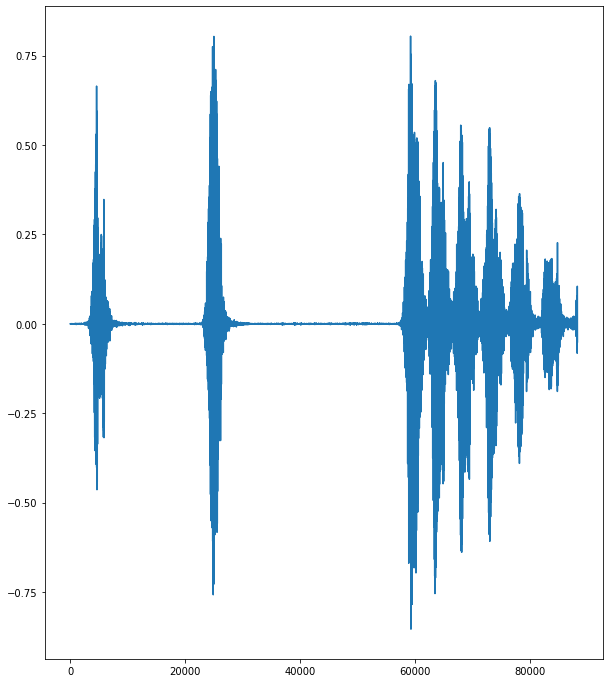

In [12]:
plt.figure(figsize=(10,12))
plt.plot(audios[0])
plt.show()

IndexError: tuple index out of range

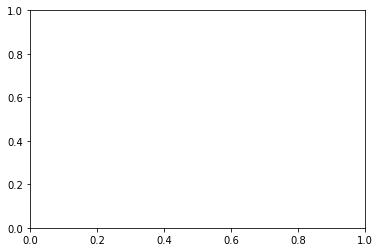

In [19]:
fig, ax = plt.subplots()
img = librosa.display.specshow(audios[0], cmap='gray_r', y_axis='log', x_axis='time', ax=ax)
ax.set(title='Inverted grayscale')
fig.colorbar(img, ax=ax, format="%+2.f dB")